# Loading libraries

In [1]:
#Importing libraries for data manipulation
import pandas as pd
import numpy as np

#Importing libraries for Visualization
import matplotlib.pyplot as plt
%matplotlib inline

#Importing libraries for stop future warning
import warnings
warnings.filterwarnings('ignore')

#Importing libraries for Time Series Analysis
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.seasonal import seasonal_decompose
from pmdarima import auto_arima
from statsmodels.tools.eval_measures import rmse

# Loading data

In [2]:
#Loading data
data = pd.read_csv('C:/Users/bhavi/OneDrive/Desktop/Data/Time_Series_Data/co2_mm_mlo.csv')

In [3]:
#Checking the data
data

,year,month,decimal_date,average,interpolated
0,1958,3,1958.208,315.71,315.71
1,1958,4,1958.292,317.45,317.45
2,1958,5,1958.375,317.50,317.50
3,1958,6,1958.458,NaN,317.10
4,1958,7,1958.542,315.86,315.86
...,...,...,...,...,...
724,2018,7,2018.542,408.71,408.71
725,2018,8,2018.625,406.99,406.99
726,2018,9,2018.708,405.51,405.51
727,2018,10,2018.792,406.00,406.00


In [4]:
#Creating date features
data['date'] = pd.to_datetime({'year':data['year'],
                              'month':data['month'],
                              'day':1})

In [7]:
#Checking the data
data

,year,month,decimal_date,average,interpolated,date
0,1958,3,1958.208,315.71,315.71,1958-03-01
1,1958,4,1958.292,317.45,317.45,1958-04-01
2,1958,5,1958.375,317.50,317.50,1958-05-01
3,1958,6,1958.458,NaN,317.10,1958-06-01
4,1958,7,1958.542,315.86,315.86,1958-07-01
...,...,...,...,...,...,...
724,2018,7,2018.542,408.71,408.71,2018-07-01
725,2018,8,2018.625,406.99,406.99,2018-08-01
726,2018,9,2018.708,405.51,405.51,2018-09-01
727,2018,10,2018.792,406.00,406.00,2018-10-01


In [6]:
#Checking data type
data.dtypes

year                     int64
month                    int64
decimal_date           float64
average                float64
interpolated           float64
date            datetime64[ns]
dtype: object

In [8]:
#Setting date as an index
data.set_index('date', inplace=True)

In [9]:
#Checking the data
data

,year,month,decimal_date,average,interpolated
date,,,,,
1958-03-01,1958,3,1958.208,315.71,315.71
1958-04-01,1958,4,1958.292,317.45,317.45
1958-05-01,1958,5,1958.375,317.50,317.50
1958-06-01,1958,6,1958.458,NaN,317.10
1958-07-01,1958,7,1958.542,315.86,315.86
...,...,...,...,...,...
2018-07-01,2018,7,2018.542,408.71,408.71
2018-08-01,2018,8,2018.625,406.99,406.99
2018-09-01,2018,9,2018.708,405.51,405.51


In [11]:
#Changing frequency
data.index.freq = 'MS'

Observation:
- Data consist of 60.75 years.

# Visualizing the data

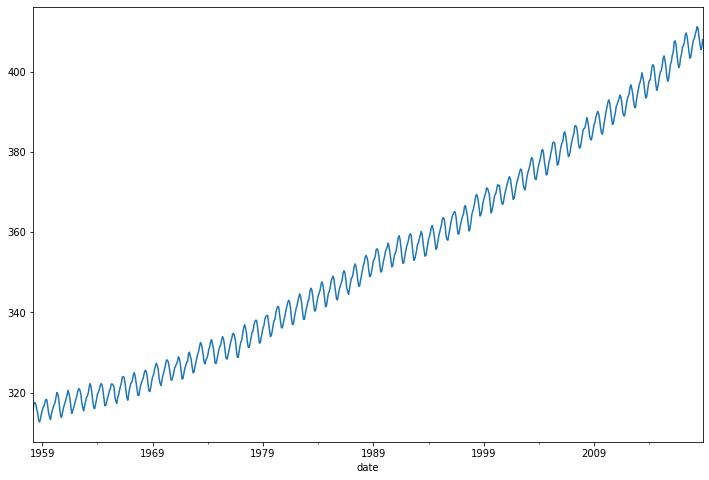

In [12]:
#Ploting the data
data['interpolated'].plot(figsize = (12,8));

Observation:
- Data have trend and seasonality.

# Decomposition of the data

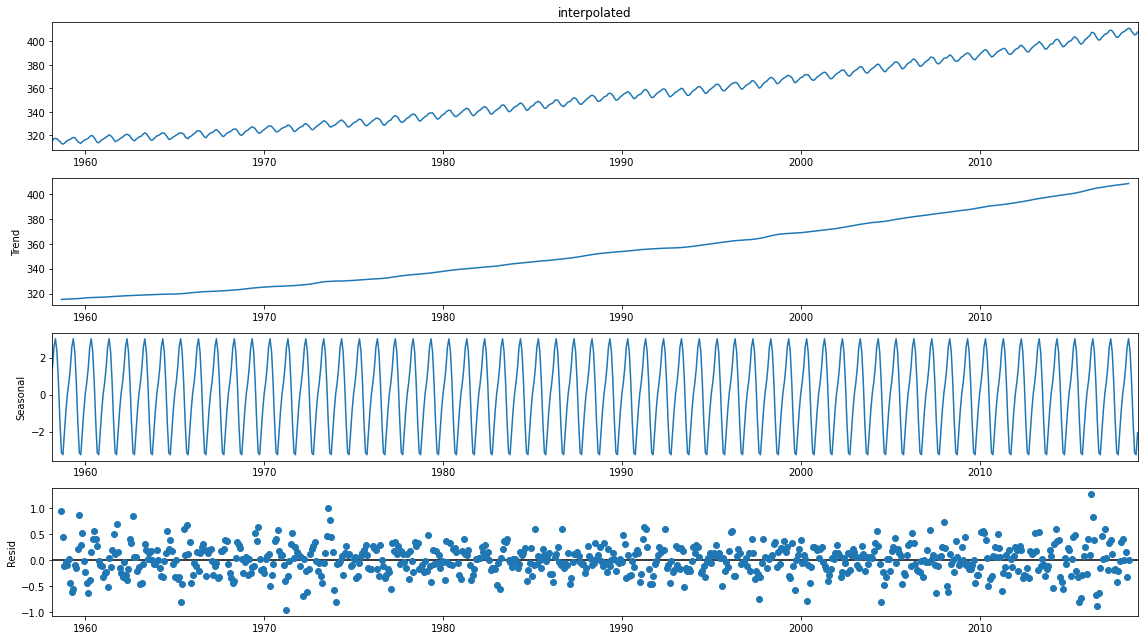

In [13]:
#Decomposing the data
plt.rcParams["figure.figsize"] = (16, 9)
decompose = seasonal_decompose(data['interpolated'], model='add')
decompose.plot();

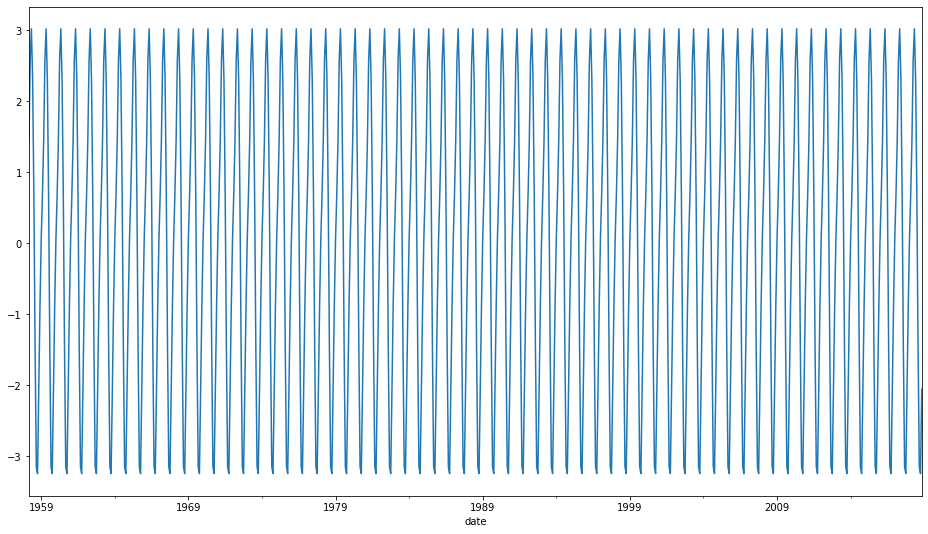

In [14]:
#Checking seasonality plot
decompose.seasonal.plot();

# Performing Auto ARIMA

In [15]:
#Performing auto ARIMA
auto_arima(data['interpolated'], 
           seasonal=True,
           m=12,
           suppress_warnings=True).summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                                  y   No. Observations:                  729
Model:             SARIMAX(2, 1, 1)x(1, 0, 1, 12)   Log Likelihood                -206.257
Date:                            Mon, 29 Mar 2021   AIC                            424.514
Time:                                    21:02:49   BIC                            452.056
Sample:                                         0   HQIC                           435.141
                                            - 729                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.3538      0.054      6.570      0.000       0.248       0.459
ar.L2          0.0858      0.024      3.640      0.000       0.040       0.132
ma.L1         -0.7076      0.043    -16.349      0.000      -0.792      -0.623
ar.S.L12       0.9996      0.000   2782.495      0.000       0.999       1.000
ma.S.L12      -0.8670      0.021    -40.612      0.000      -0.909      -0.825
sigma2         0.0958      0.005     20.528      0.000       0.087       0.105
===================================================================================
Ljung-Box (L1) (Q):                   0.09   Jarque-Bera (JB):                 4.49
Prob(Q):                              0.77   Prob(JB):                         0.11
Heteroskedasticity (H):               1.13   Skew:                            -0.00
Prob(H) (two-sided):                  0.35   Kurtosis:                         3.38
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

# Splitting data into train and test

In [16]:
#Splitting data into train and test
train = data[:717]
test = data[717:]
train.shape, test.shape

((717, 5), (12, 5))

# Creating SARIMA Model & Predicting on test data

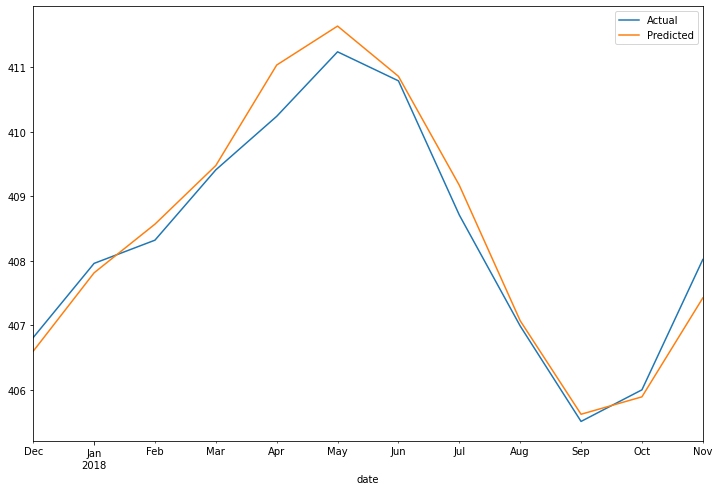

In [19]:
#Creating SARIMA Model
model = SARIMAX(train['interpolated'], order=(2,1,1), seasonal_order=(1,0,1,12))
result = model.fit()

#Prediction on the model
pred = result.predict(start = len(train), end = len(train)+len(test)-1, typ = 'levels')

#Creating Actual vs Prediction Plot
test['interpolated'].plot(figsize = (12,8), label = 'Actual', legend = True);
pred.plot(label = 'Predicted',legend = True);

# Evaluation peformance of the model

In [20]:
#Evaluation peformance of the model
print('RMSE:',rmse(test['interpolated'], pred))
print('Mean:',test['interpolated'].mean())

RMSE: 0.35671289823991104
Mean: 408.3333333333333


# Forecasting on unknown data

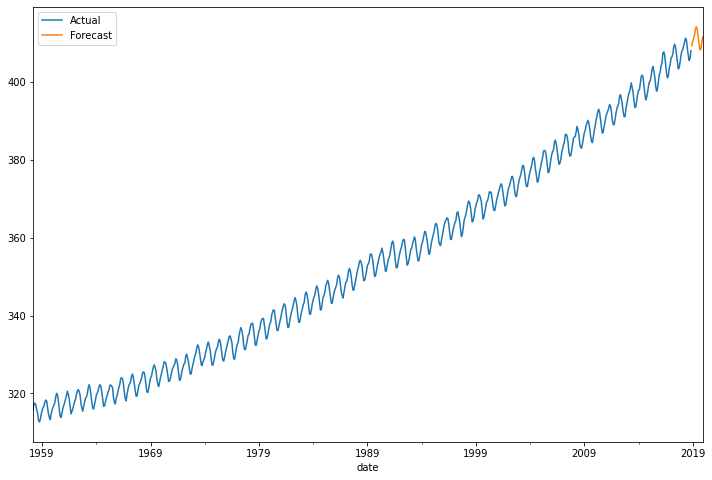

In [26]:
#Forecating unknown features
model = SARIMAX(data['interpolated'], order=(0,1,1), seasonal_order=(1,0,1,12))
result = model.fit()

#Forecasting on the model for next 12 months
pred = result.predict(start = len(data), end = len(data)+12, typ = 'levels').rename('SARIMA Forecast')

#Creating plot
data['interpolated'].plot(figsize = (12,8), label='Actual',legend = True);
pred.plot(label ='Forecast',legend = True);

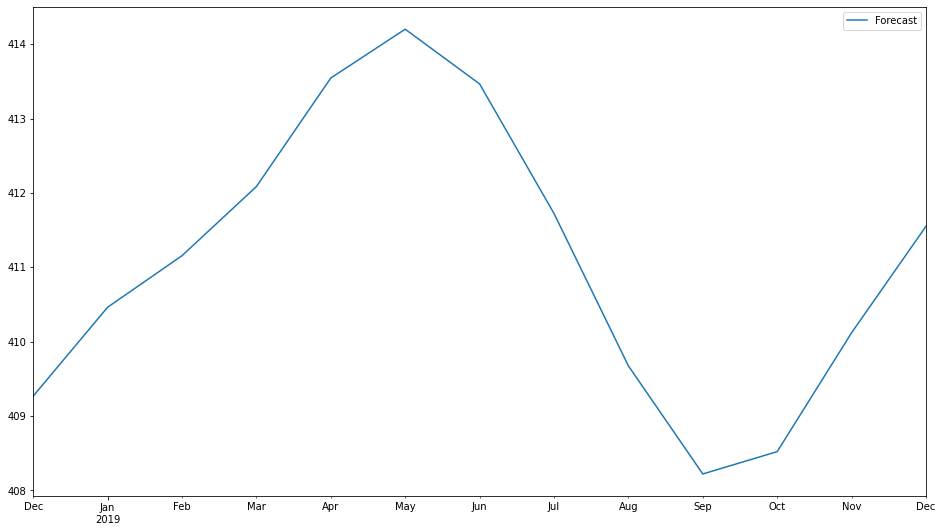

In [27]:
#Forecast plot
pred.plot(label ='Forecast',legend = True);